In [3]:
import ccs_eeg_utils
x = ccs_eeg_utils.simulate_ICA(dims=2)

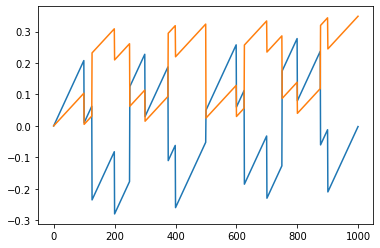

In [5]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(x.T)

In [6]:
import scipy as scp
import scipy.stats
def whiten(x):
    mM = np.mean(x,axis=1)
    sph = np.linalg.inv(scp.linalg.sqrtm(np.cov(x)))
    xM = np.subtract(x.T,mM)
    whiteX = np.matmul(sph,xM.T)
    return whiteX
whiteX = whiten(x)

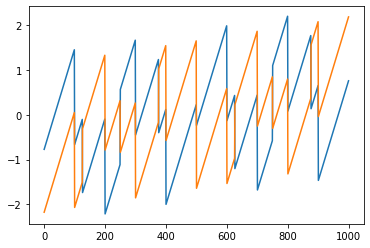

In [7]:
plt.plot(whiteX.T)

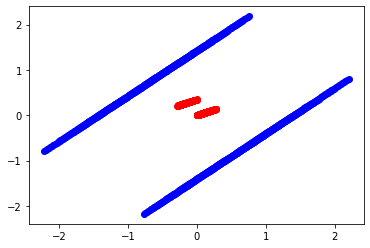

In [8]:
plt.plot(whiteX[0,:],whiteX[1,:],'bo')
plt.plot(x[0,:],x[1,:],'ro')

In [9]:
# arbitrary 2d rotation matrix
turn =lambda k: np.reshape(np.array([np.cos(k), np.sin(k), -np.sin(k), np.cos(k)]),(2,2))
kurt = []
# rotate from 0 to pi
r = np.linspace(0,2*np.pi,1000)
for l in r:
    # turn 
    x_bar = np.matmul(turn(l),whiteX)
    # calc kurtosis
    kurt.append(np.sum(np.abs(scp.stats.kurtosis(x_bar,axis=1))))


224.14414414414412


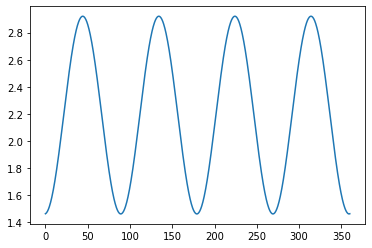

In [10]:
plt.plot(r/np.pi*180,kurt)
best_turn = r[np.argmax(kurt)]
print(best_turn/np.pi*180)

In [11]:
x_unmixed = np.matmul(turn(best_turn),whiteX)

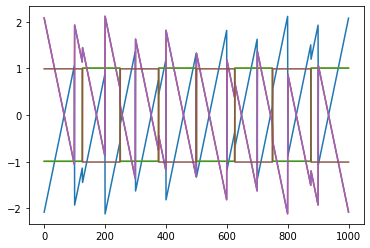

In [12]:
x_unmixed = np.matmul(turn(45. /180 * np.pi),whiteX)
plt.plot(x_unmixed.T)
x_unmixed = np.matmul(turn(135. /180 * np.pi),whiteX)
plt.plot(x_unmixed.T)
x_unmixed = np.matmul(turn((180. + 45.) /180 * np.pi),whiteX)
plt.plot(x_unmixed.T)

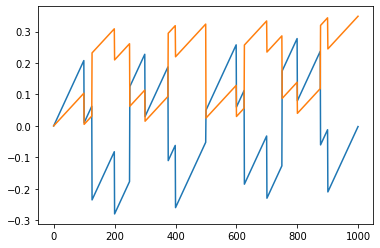

In [13]:
plt.plot(x.T)

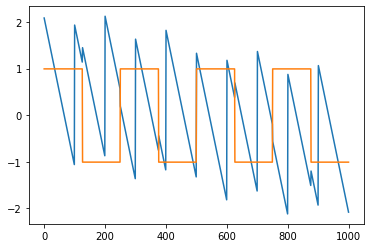

In [14]:
plt.plot(x_unmixed.T)


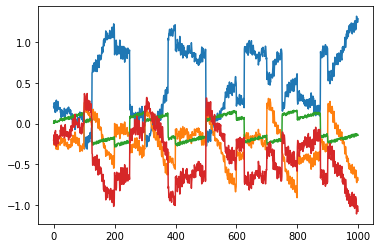

In [15]:
x = ccs_eeg_utils.simulate_ICA(dims=4)
plt.plot(x.T)

In [16]:
import mne
unmix = mne.preprocessing.infomax(x.T,verbose=True)


Computing Extended Infomax ICA
step 1 - lrate 0.003607, wchange 1679.65809715, angledelta  0.0 deg
step 2 - lrate 0.003607, wchange 205374.28543419, angledelta  0.0 deg
step 3 - lrate 0.001803, wchange 7966.52383819, angledelta 82.1 deg
step 4 - lrate 0.001623, wchange 2907.30768088, angledelta 47.6 deg
step 5 - lrate 0.001623, wchange 8853.54560335, angledelta 41.3 deg
step 6 - lrate 0.001623, wchange 5508.40404139, angledelta 59.9 deg
step 7 - lrate 0.001623, wchange 1335.85248443, angledelta 63.7 deg
step 8 - lrate 0.001461, wchange 1289.54733779, angledelta 53.3 deg
step 9 - lrate 0.001461, wchange 1331.34460120, angledelta 34.2 deg
step 10 - lrate 0.001461, wchange 503.42851900, angledelta 69.3 deg
step 11 - lrate 0.001315, wchange 365.78643694, angledelta 91.9 deg
step 12 - lrate 0.001183, wchange 280.54982422, angledelta 116.9 deg
step 13 - lrate 0.001065, wchange 174.90634978, angledelta 109.0 deg
step 14 - lrate 0.000958, wchange 111.45176564, angledelta 116.6 deg
step 15 - lr

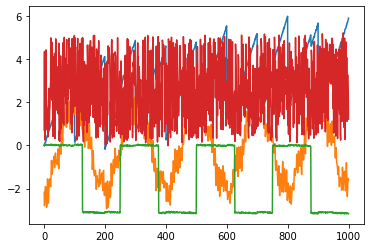

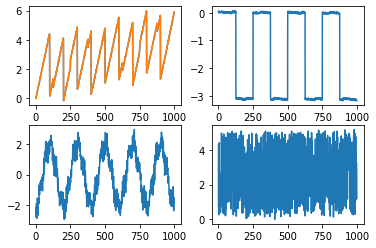

In [17]:

plt.plot(np.dot(unmix,x).T)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(np.dot(unmix,x)[0,:])
axs[0, 0].plot(np.dot(unmix,x)[0,:])
axs[1, 0].plot(np.dot(unmix,x)[1,:])
axs[0, 1].plot(np.dot(unmix,x)[2,:])
axs[1, 1].plot(np.dot(unmix,x)[3,:])


In [18]:
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
bids_root = "../local/bids_old/"
subject_id = '002'


bids_path = BIDSPath(subject=subject_id,task="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)
print(bids_path)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()
raw.filter(0.5,50, fir_design='firwin')
raw.set_montage('standard_1020',match_case=False)



..\local\bids_old\sub-002\eeg\sub-002_task-P3_eeg.set
Reading ..\local\bids_old\sub-002\eeg\sub-002_task-P3_eeg.fdt
Reading events from ..\local\bids_old\sub-002\eeg\sub-002_task-P3_events.tsv.
Reading channel info from ..\local\bids_old\sub-002\eeg\sub-002_task-P3_channels.tsv.
Reading 0 ... 414719  =      0.000 ...   404.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)



<RawEEGLAB | sub-002_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.5 MB, data loaded>

In [19]:
    ica = mne.preprocessing.ICA(method="fastica")
    ica.fit(raw,verbose=True)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 30 components
Fitting ICA took 31.6s.


<ICA | raw data decomposition, fit (fastica): 414720 samples, 30 components, channels used: "eeg">

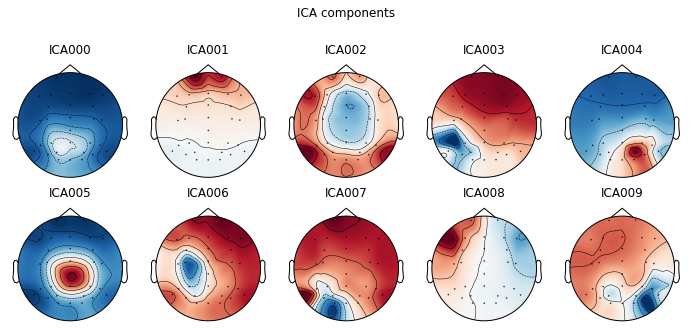

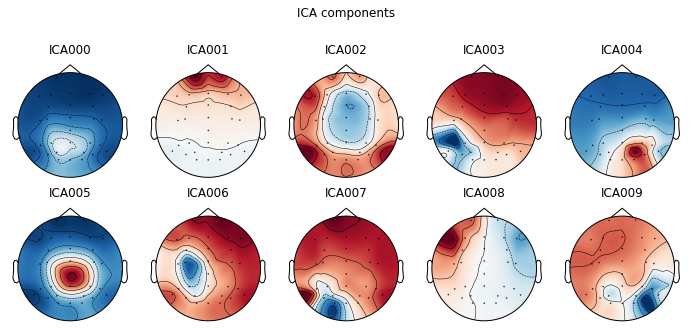

In [20]:
ica.plot_components(range(10))

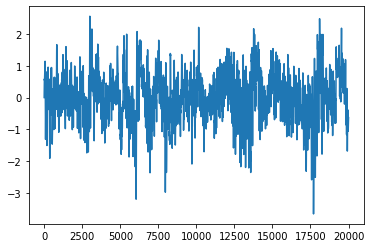

In [21]:
icaact = ica.get_sources(raw)
plt.plot(icaact[5,0:20000][0].T)
#plt.plot(raw[0,0:20000][0].T)

In [24]:
from importlib import reload  
reload(mne)
ica.plot_properties(raw,picks=[0,1],psd_args={'fmax': 35.},reject=None)
print(1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
ica.plot_properties(raw)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [83]:
import mne
evts,evts_dict = mne.events_from_annotations(raw)
wanted_keys = [e for e in evts_dict.keys() if "response" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']


Not setting metadata
Not setting metadata
202 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Need more than one channel to make topography for eeg. Disabling interactivity.


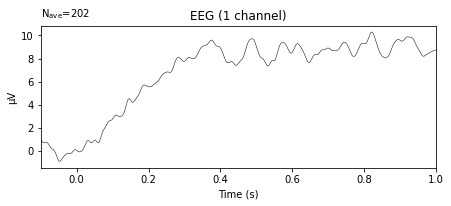

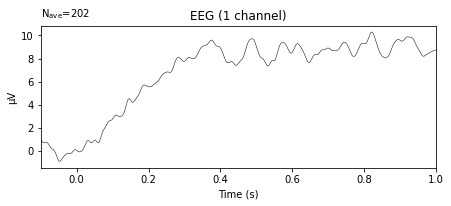

In [100]:
epochs = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1)
epochs.average().plot(picks='Oz')

In [84]:
epochs = mne.Epochs(ica.get_sources(raw),evts,evts_dict_stim,tmin=-0.1,tmax=1)

Not setting metadata
Not setting metadata
202 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


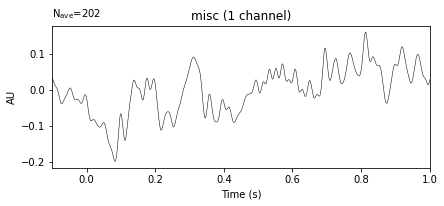

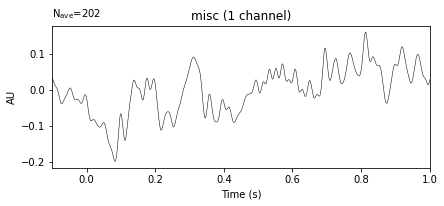

In [95]:
epochs.average(picks=).plot()

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components


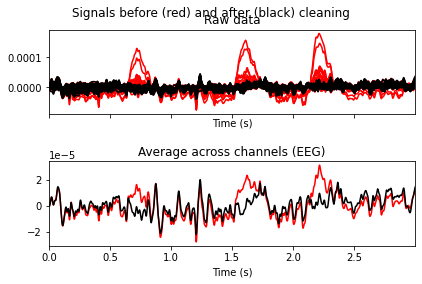

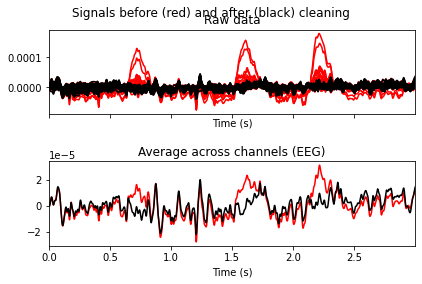

In [82]:
reconst_raw = raw.copy()
#ica.apply(reconst_raw,exclude=[1,8,9])

#raw.plot()
#reconst_raw.plot()  
ica.plot_overlay(raw,exclude=[1,8,9])


whiteX = whiten(x)

w = np.eye(x.shape[0])

#f = lambda x: np.tanh(x)
#f = lambda x: x-np.tanh(x)
I = np.eye(x.shape[0]) 
#f =lambda x:  1./(1+np.exp(-x))
f = lambda x:  (2 / (1 + np.exp(-x)))
lr = 0.01


bias1 = np.zeros((x.shape[0], 1))
for k in range(0,50000):
    u = np.matmul(w,whiteX)
    
    #A = np.matmul(f(u),u.T)
    #A = np.dot(f(u),u.T)
    #dW = lr * np.dot(( I - A ),w)



    unmixed = np.dot(w, whiteX) + bias1
    logit = 1 - (2 / (1 + np.exp(-unmixed)))
    w = w + lr * np.dot(I + np.dot(logit, unmixed.T), w)
    bias1 = bias1 + lr * logit.sum(axis=1).reshape(bias1.shape)

    if np.mod(k,5000)==0:
        print(A)

    if np.max(np.abs(w))>100:
        print("reducing learningrate \n")
        lr = lr*0.2
        # reset w
        w = np.eye(x.shape[0]) 
        continue
    w = w+ dW

    #u2 = w2*x;
    #w2 = w2+0.0001*(I+ (1- 2*f2(u2))*u2')*w2;


